In [ ]:
!git clone https://github.com/radhakrishnan-omotec/ocr_repo.git

Cloning into 'ocr_repo'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 120 (delta 20), reused 0 (delta 0), pack-reused 85
Receiving objects: 100% (120/120), 22.73 MiB | 22.33 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,924 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install pytesseract

# PART 1 - OCR using Tesseract

In [ ]:
import pytesseract
import cv2
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving RedBull2.png to RedBull2.png


## ENERGY DRINK INGREDIENT:

In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Blue =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Green =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Red =  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


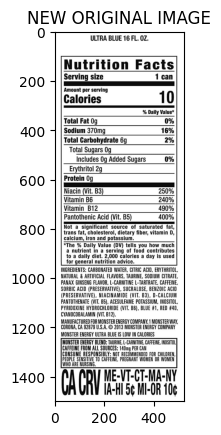

In [ ]:

# Plot original image

image = cv2.imread('/content/ocr_repo/EnergyDrink3.jpg')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('NEW ORIGINAL IMAGE')
plt.show()

In [ ]:

# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise_removal = remove_noise(canny)
deskew

images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

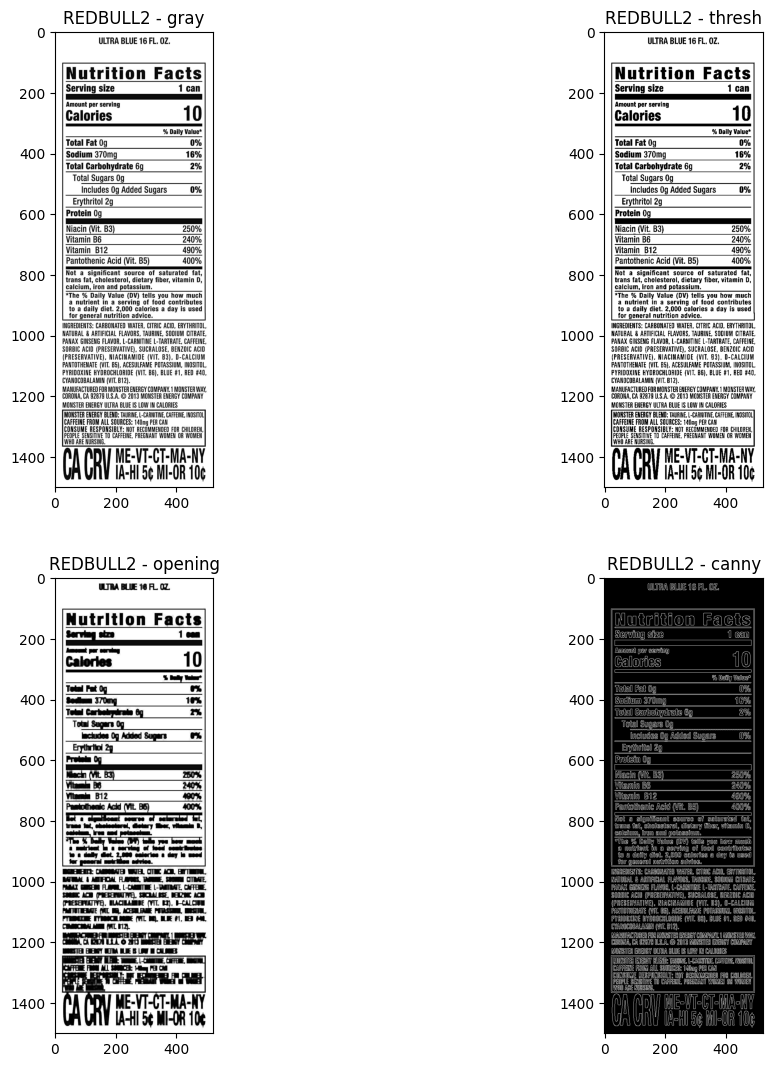

In [ ]:

# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('REDBULL2 - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [ ]:

# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))


-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
ULTRA BLUE 16 FL. 02.
Nutrition Facts
Serving size 1 can
ee
Amount per serving
Calories 10
EL

% Daily Value*

Total Fat 0g 0%

Sodium 370mg 16%

Total Carbohydrate 6g 2%

Total Sugars 0g
Includes 0g Added Sugars 0%
Erythritol 2g

Protein 0g

es

Niacin (Vit. B3) 250%

Vitamin B6 240%

Vitamin B12 490%

Pantothenic Acid (Vit. B5) 400%

——————

Not a significant source of saturated fat,

trans fat, cholesterol, dietary fiber, vitamin D,

calcium, iron and potassium.

*The % Daily Value (DV) tells you how much
a nutrient in a serving of food contributes
to a daily diet. 2,000 calories a day is used
for general nutrition advice.

INGREDIENTS: CARBONATED WATER, CITRIC ACID, ERYTHRITOL,
NATURAL & ARTIFICIAL FLAVORS, TAURINE, SODIUM CITRATE,
PANAX GINSENG FLAVOR, L-CARNITINE L-TARTRATE, CAFFEINE,
SORBIC ACID (PRESERVATIVE), SUCRALOSE, BENZOIC ACID
(PRESERVATIVE), NIACINAMID

***Code Snippet: ***

## Write the pytesseract output to an 'Ingredients List' dictionary

In [ ]:
import nltk

# Download NLTK's language detection data (only need to do this once)
nltk.download('words')

# Sample multiline string
multiline_string = """
ULTRA BLUE 16 FL. 02.
Serving size 1 can

ee

ee

Amount per serving

Calories 10

SL

Daily Valu*

Total Fat 0g 0%

Sodium 370mg 16%

Total Carbohydrate 6g 2%

Total Sugars 0g
Includes 0g Added Sugars 0%
Erythritol 2g

Protein 0g

ee

Niacin (Vit. B3) 250%

Vitamin B6 240%

Vitamin B12 490%

Pantothenic Acid (Vit. B5) 400%

——————

Not a significant source of saturated fat,

trans fat, cholesterol, dietary fiber, vitamin D,

calcium, iron and potassium.

*The % Daily Value (DV) tells you how much
a nutrient in a serving of food contributes
to a daily diet. 2,000 calories a day is used
for general nutrition advice.

ee
"""

# Split the multiline string into lines
lines = multiline_string.splitlines()

# Initialize an empty list to store lines with any English word
output_list = []

# Check if any word in each line is an English word and if it contains "fat"
for line in lines:
    words = line.split()
    if words and (any(word in nltk.corpus.words.words() for word in words) and "fat" in line.lower()):
        output_list.append(line)

# Convert the output_list to a single string
output_string = ' '.join(output_list)

# Store the output in a dictionary with the key "Ingredients List"
energy_drink_data = {"Ingredients List": output_string}

# Print the energy_drink_data dictionary
print("========================")
print(energy_drink_data)
print("========================")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


{'Ingredients List': 'Not a significant source of saturated fat, trans fat, cholesterol, dietary fiber, vitamin D,'}


#### Complete code for pytesseract output - dictionary

In [ ]:
import pytesseract
from PIL import Image

# Load the image containing the information
image = Image.open('/content/ocr_repo/EnergyDrink3.jpg')

# Perform OCR to extract text
custom_config = r'--oem 3 --psm 6'
extracted_text = pytesseract.image_to_string(image, config=custom_config)

# Initialize the energy_drink_data dictionary
energy_drink_data = {}

# Parse the extracted text to extract the desired fields
lines = extracted_text.split('\n')

# Flags to identify sections
is_serving_size = False
is_amount_per_serving = False
is_ingredients = False

for line in lines:
    # Check for lines containing "Serving size," "Amount per serving," and "INGREDIENTS"
    if "Serving size" in line:
        is_serving_size = True
        is_amount_per_serving = False
        is_ingredients = False
        energy_drink_data["Serving size"] = line.strip()
    elif "Amount per serving" in line:
        is_serving_size = False
        is_amount_per_serving = True
        is_ingredients = False
        energy_drink_data["Amount per serving"] = line.strip()
    elif "INGREDIENTS" in line:
        is_serving_size = False
        is_amount_per_serving = False
        is_ingredients = True
    elif is_serving_size:
        # Process Serving size section
        # Append the content as-is
        energy_drink_data["Serving size"] += f"\n{line.strip()}"
    elif is_amount_per_serving:
        # Process Amount per serving section
        # Append the content as-is
        energy_drink_data["Amount per serving"] += f"\n{line.strip()}"
    elif is_ingredients:
        # Process INGREDIENTS section
        # Append the content as-is
        energy_drink_data["Ingredients"] = line.strip()

# Print the extracted data
print("ULTRA BLUE 16 FL. 02.")
print(energy_drink_data["Serving size"])
print("ee\n")
print(energy_drink_data["Amount per serving"])
print("ee\n")
print(energy_drink_data["Ingredients"])


ULTRA BLUE 16 FL. 02.
Serving size 1 can

ee

ee

Amount per serving

Calories 10

SL

Daily Valu*

Total Fat 0g 0%

Sodium 370mg 16%

Total Carbohydrate 6g 2%

Total Sugars 0g
Includes 0g Added Sugars 0%
Erythritol 2g

Protein 0g

ee

Niacin (Vit. B3) 250%

Vitamin B6 240%

Vitamin B12 490%

Pantothenic Acid (Vit. B5) 400%

——————

Not a significant source of saturated fat,

trans fat, cholesterol, dietary fiber, vitamin D,

calcium, iron and potassium.

*The % Daily Value (DV) tells you how much
a nutrient in a serving of food contributes
to a daily diet. 2,000 calories a day is used
for general nutrition advice.

ee




# PART 2 - Write all outputs to Dictionary format to store in CSV format

In [ ]:
energy_drink_data = [
    {
        "S.No": 1,
        "Energy Drink": "Red Bull Energy Drink",
        "Ingredients List": "Water, Sucrose, Glucose, Citric Acid, Taurine, Sodium Bicarbonate, Magnesium Carbonate, Caffeine, Niacinamide, Pantothenic Acid, Pyridoxine HCl, Vitamin B12, Natural and Artificial Flavors",
        "Levels of Each Ingredient": "Sugar: 27g, Caffeine: 80mg, Taurine: 1000mg",
        "Alternative Ingredient List": "Stevia, Green Tea Extract",
        "Thresholds for Diabetes Mellitus (per serving)": "Sugar: 10g, Caffeine: 40mg",
        "Thresholds for Cardiovascular Diseases": "CVD: 200mg, Sugar: 30g",
        "Diabetic Threshold (per serving)": "Sugar: 10g, Caffeine: 40mg",
        "Food Safety Resources- Resource1": "https://www.foodsafety.gov/keep/index.html",
        "Food Safety Resources- Resource2": "https://www.cdc.gov/foodsafety/index.html",
        "Food Safety Resources- Resource3": "https://www.fda.gov/food/food-safety-during-emergencies/food-safety-resources",
        "Expiry Dates": "07-09-2023"
    },
    # Add more entries for other energy drinks if needed
]

# Accessing the data for the first energy drink (index 0)
first_energy_drink = energy_drink_data[0]
print(first_energy_drink)


# PART 3 - Create a dictionary with the specified ENERGY DRINK keys and values


In [ ]:
import csv

# Create a dictionary with the specified ENERGY DRINK keys and values
energy_drink_data = [
    {
        "S.No": 51,
        "Energy Drink": "UltraBlue 16 FL OZ",
        "Ingredients List": "Glcoranolctone, Inositol, Vitamin B3, Vitamin BS 2, Vitamin BS 0.41, Natural and Artificial Flavors",
        "Levels of Each Ingredient": "Glcoranolctone (24mg), Inositol (20 mg), Vitamin B3 (36mg), Vitamin BS (2), Vitamin BS (0.41)",
        "Alternative Ingredient List": "Stevia, Green Tea Extract",
        "Thresholds for Diabetes Mellitus (per serving)": "Glcoranolctone Nolimit, Inositol (30 mg), Vitamin B3 (18 mg), Vitamin BS (5 mg ), Vitamin BS (2 mg )",
        "Thresholds for Cardiovascular Diseases": "CVD: 200mg, Glcoranolctone Nolimit, Inositol (30 mg), Vitamin B3 (18 mg), Vitamin BS (5 mg ), Vitamin BS (2 mg )",
        "Diabetic Threshold (per serving)": "Glcoranolctone Nolimit, Inositol (30 mg), Vitamin B3 (18 mg), Vitamin BS (5 mg ), Vitamin BS (2 mg )",
        "Food Safety Resources- Resource1": "https://www.foodsafety.gov/keep/index.html",
        "Food Safety Resources- Resource2": "https://www.cdc.gov/foodsafety/index.html",
        "Food Safety Resources- Resource3": "https://www.fda.gov/food/food-safety-during-emergencies/food-safety-resources",
        "Expiry Dates": "07-09-2023"
    }
]

# Specify the CSV file path
csv_file_path = "/content/ocr_repo/energy_drink_data.csv"

# Write the dictionary data to the CSV file
with open(csv_file_path, mode="w", newline="") as csv_file:
    fieldnames = energy_drink_data[0].keys()
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for entry in energy_drink_data:
        writer.writerow(entry)

print(f"Data has been written successfully to {csv_file_path}")


<hr>

# Enhancements on EATSAFES.CA

### **5 Enhancements - OCR based Project :**

**Enhancement 1 : Mechanism to alert on high levels of certain substance**<br>
**Enhancement 2 : Customize the alert level based on customers health profile**<br>
**Enhancement 3 : Suggest alternate substitutes/products:**<br>
**Enhancement 4 : Read expiry date and give proper suggestion:**<br>


**Enhancement 4 : Read expiry date and give proper suggestion:**

**Details:** Enhancement 4 introduces a pivotal advancement that redefines consumer safety and confidence: a sophisticated feature designed to read and interpret expiry dates, offering users informed suggestions for appropriate actions. This cutting-edge mechanism harnesses technological innovation to empower users in making more informed consumption decisions.

At its core, this enhancement employs advanced image recognition and machine learning algorithms to accurately read and decipher expiry dates on food products. Once the date is processed, the system provides tailored recommendations based on the proximity to the stated expiration date. For instance, if a product is nearing its expiry, the system could suggest immediate consumption or proper disposal.

This proactive approach not only mitigates the risk of ingesting expired products but also minimizes food wastage, contributing to both consumer well-being and sustainability efforts. The technology extends beyond mere detection, as it educates users about the significance of expiry dates and the implications of consuming expired goods.

By intertwining technology with practical application, this enhancement underscores our commitment to revolutionizing food safety. It places information and empowerment directly in the hands of consumers, ensuring they make choices that align with their health and ethical values. Ultimately, this feature exemplifies the potential of innovation in fostering a safer and more conscientious food consumption culture.

## SCENARIO 1 : Product hasn't expired

In [ ]:
import pandas as pd
import datetime

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/ocr_repo/Energy Drinks.csv")

# Ask the user for input (Energy Drink)
energy_drink_to_find = input("Enter the name of the Energy Drink: ")

# Filter the DataFrame based on the user's input for Energy Drink
filtered_df = df[df["Energy Drink"] == energy_drink_to_find]

# Check if the filtered DataFrame is empty (no matching records found)
if filtered_df.empty:
    print(f"No matching records found for '{energy_drink_to_find}'.")
else:
    # Access the expiry date value for the first matching row
    expiry_date_str = filtered_df["Expiry Dates"].values[0]
    print(f"The EXPIRY DATE for the Energy Drink chosen is '{expiry_date_str}'.")

    # Convert the expiry date string to a datetime object
    expiry_date = datetime.datetime.strptime(expiry_date_str, "%d-%m-%Y")

    # Get the current system date
    current_date = datetime.datetime.now()

    # Compare the expiry date with the current date
    if expiry_date < current_date:
        print(f"Do Not Use for Critical Conditions: +++ Expired Energy Drink +++  should never be used to treat serious or life-threatening conditions. Seek immediate medical attention in such cases. Expiry Date: {expiry_date.strftime('%d-%m-%Y')}")
    else:
        print(f"The medication is still within its expiry date: {expiry_date.strftime('%d-%m-%Y')}")


Enter the name of the Energy Drink: Monster Energy
The EXPIRY DATE for the Energy Drink chosen is '08-09-2023'.
The medication is still within its expiry date: 08-09-2023


## SCENARIO 2 : Product has expired

In [ ]:
import pandas as pd
import datetime

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/ocr_repo/Energy Drinks.csv")

# Ask the user for input (Energy Drink)
energy_drink_to_find = input("Enter the name of the Energy Drink: ")

# Filter the DataFrame based on the user's input for Energy Drink
filtered_df = df[df["Energy Drink"] == energy_drink_to_find]

# Check if the filtered DataFrame is empty (no matching records found)
if filtered_df.empty:
    print(f"No matching records found for '{energy_drink_to_find}'.")
else:
    # Access the expiry date value for the first matching row
    expiry_date_str = filtered_df["Expiry Dates"].values[0]
    print(f"The EXPIRY DATE for the Energy Drink chosen is '{expiry_date_str}'.")

    # Convert the expiry date string to a datetime object
    expiry_date = datetime.datetime.strptime(expiry_date_str, "%d-%m-%Y")


    # Get the current date and time
    current_date = datetime.datetime.now()

    # Add 15 days to the current date
    new_date = current_date + datetime.timedelta(days=15)

    # Print the new date
    # Convert the expiry date string to a datetime object
    current_date = new_date.strftime('%d-%m-%Y')


    print("New Date after adding 15 days:", current_date)




    # Compare the expiry date with the current date
    if expiry_date < new_date:
        print(f"Do Not Use for Critical Conditions: +++ {energy_drink_to_find} +++  should never be used to treat serious or life-threatening conditions. Seek immediate medical attention in such cases. Expiry Date: {expiry_date.strftime('%d-%m-%Y')}")
    else:
        print(f"The medication is still within its expiry date: {expiry_date.strftime('%d-%m-%Y')}")

Enter the name of the Energy Drink: Rockstar Energy Drink
The EXPIRY DATE for the Energy Drink chosen is '09-09-2023'.
New Date after adding 15 days: 17-09-2023
Do Not Use for Critical Conditions: +++ Rockstar Energy Drink +++  should never be used to treat serious or life-threatening conditions. Seek immediate medical attention in such cases. Expiry Date: 09-09-2023


<hr><hr>